In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math
from datetime import datetime
from arch.unitroot import ADF
import statsmodels.api as sm

yf.pdr_override

<function yfinance.pdr_override()>

In [2]:
Pair1 = "HAL"
Pair2 = "XOM"
Start = datetime(2007, 12, 31) #model period
End = datetime(2017, 12, 31)
tradeStart = datetime(2018, 1, 1) #trade period
tradeEnd = datetime(2021, 10, 19)
No_std = 1
No_std_entry = 1
inital_stocks = 1000 #no of initial stocks for X = pair2
initial_cash = 5000 #initial cash


In [3]:
df1_data =yf.download('HAL',start=Start, end= End)
Pair1_close=pd.DataFrame()
df2_data =yf.download(Pair2,start= Start, end= End)
Pair2_close=pd.DataFrame()

Pair1_close = pd.DataFrame(df1_data["Close"])
Pair2_close = pd.DataFrame(df2_data["Close"])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
Pair1_close.rename(columns={"Close": Pair1}, inplace = True)
Pair2_close.rename(columns ={"Close": Pair2}, inplace = True)

In [5]:
SP500 =yf.download('SPY',start=tradeStart, end=tradeEnd)
SP500_Close=SP500['Close']
SP500_Close = pd.DataFrame(SP500_Close)
SP500_Close.rename(columns ={"Close": SP500}, inplace = True)

[*********************100%***********************]  1 of 1 completed


TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "C:\Users\JONATHAN WIJAYA\anaconda3\lib\site-packages\pandas\core\generic.py", line 1785, in __hash__
    raise TypeError(
TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed


StopIteration: 

StopIteration: 

In [6]:
def daily_to_monthly(Pair1_close, Pair2_close):
    Pair1_close_month=Pair1_close.resample('m').mean()
    Pair2_close_month=Pair2_close.resample('m').mean()
    return Pair1_close_month, Pair2_close_month

In [7]:
Pair1_close, Pair2_close = daily_to_monthly(Pair1_close, Pair2_close) #Skip this code if using daily price

In [8]:
df = pd.concat([Pair1_close, Pair2_close], axis =1)

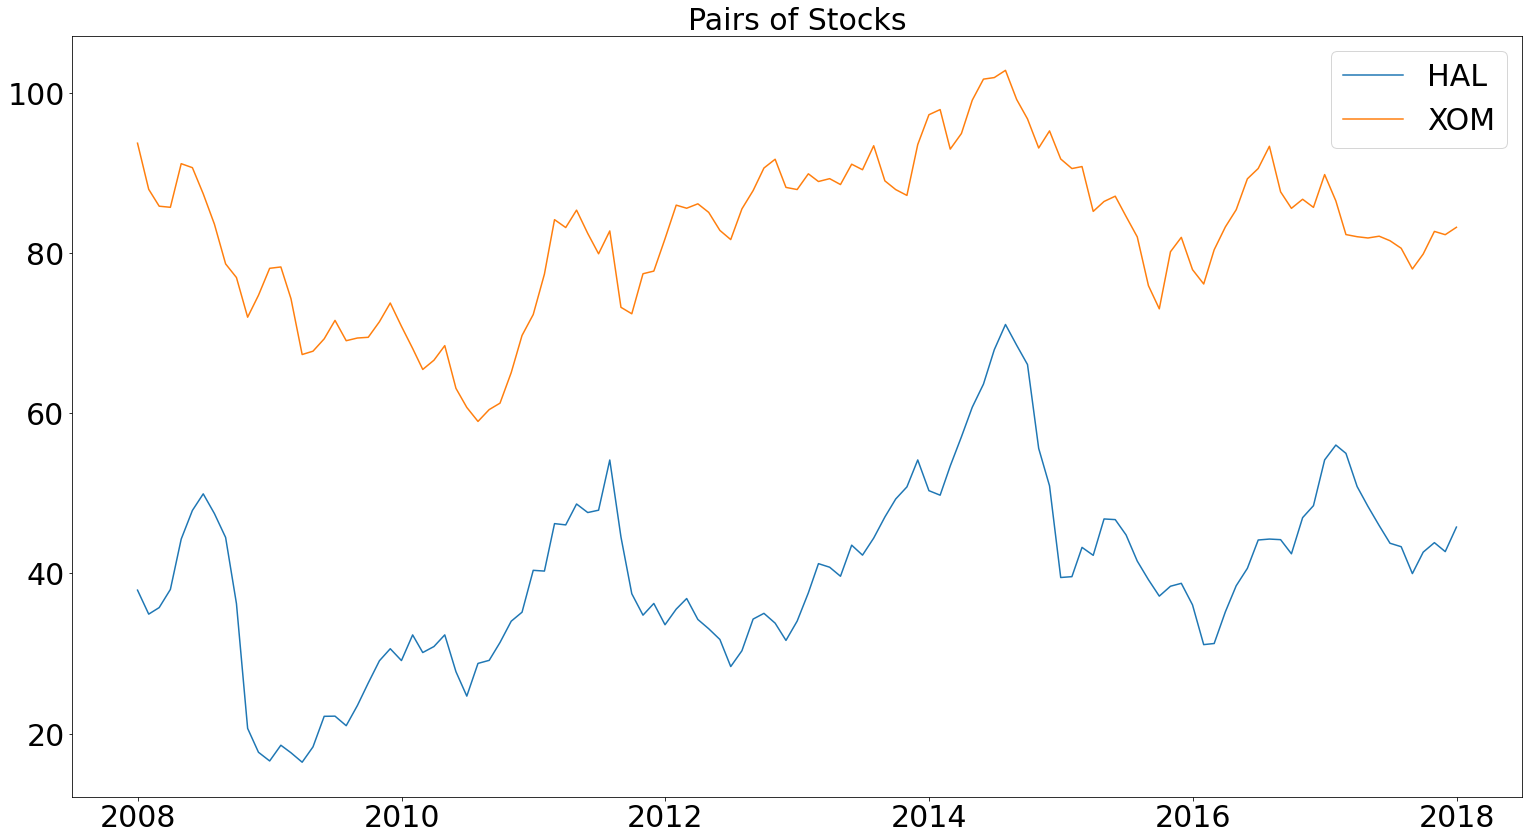

In [9]:
plt.figure(figsize=(26,14))
plt.plot(Pair1_close, label = Pair1 )
plt.plot(Pair2_close, label = Pair2)
plt.title("Pairs of Stocks",
          fontsize = 30)


plt.yticks(fontsize=30)
plt.xticks(fontsize=30)  
plt.legend(fontsize=30)
plt.show()

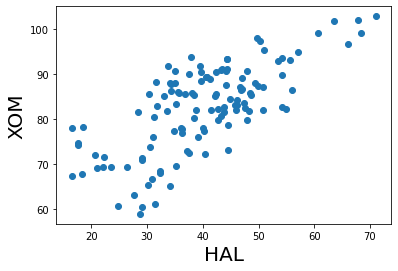

In [10]:
plt.scatter(Pair1_close,Pair2_close)
plt.xlabel(Pair1,fontsize=20)
plt.ylabel(Pair2,fontsize=20)
plt.show()

In [11]:
df.corr()

#here we note that is it + correlation with 0.72165


,HAL,XOM
HAL,1.000000,0.721675
XOM,0.721675,1.000000


# Construct Model

In [13]:
# Construct Model!
Y = Pair1_close
X = sm.add_constant(Pair2_close)
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())
print("The intercept is ", result.params[0], "and the slope coefficient is", result.params[1])

                            OLS Regression Results                            
Dep. Variable:                    HAL   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           9.81e-21
Time:                        18:43:20   Log-Likelihood:                -418.90
No. Observations:                 121   AIC:                             841.8
Df Residuals:                     119   BIC:                             847.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.1974      6.125     -4.767      0.0